In [1]:
# Features were extracted using this code in a separate terminal

# from laughter_classification.sspnet_data_sampler import SSPNetDataSampler
# s = SSPNetDataSampler('vocalizationcorpus')
# _ = s.create_sampled_df(0.1, save_path='data/sspnet_dataset_all.csv', force_save=True)
# sn = SSPNetDataSampler('vocalizationcorpus_noisy')
# _ = sn.create_sampled_df(0.1, save_path='data/sspnet_dataset_noisy_all.csv', force_save=True)

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from laughter_classification.rnn_laugh_classifier import *
from laughter_classification.visualization import plot_ROC_curve
from laughter_prediction.predictors import RnnPredictor

In [3]:
dataset = pd.read_csv('data/sspnet_dataset_all.csv')
dataset

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,MEL_120,MEL_121,MEL_122,MEL_123,MEL_124,MEL_125,MEL_126,MEL_127,IS_LAUGHTER,SNAME
0,-298.173312,55.622770,14.838277,22.100805,3.624779,13.741220,-0.725251,4.803927,-2.935554,5.145022,...,-3.564193,-3.461159,-3.395358,-3.474535,-3.354298,-3.156761,-3.498622,-4.837273,0,S0510
1,-269.409677,42.305174,-3.975652,50.572228,-1.772040,-3.530044,15.301212,-2.674766,-14.518145,21.011116,...,-3.421403,-3.364087,-3.432750,-3.413895,-3.543802,-3.206865,-3.393544,-4.712205,0,S0510
2,-282.917412,48.281070,-1.901616,30.451558,-3.341447,5.851064,9.457395,5.670964,-5.989233,10.193269,...,-3.380013,-3.600103,-3.369580,-3.515408,-3.479735,-3.285441,-3.446647,-4.809976,0,S0510
3,-283.399498,43.620396,2.429851,36.898283,0.510149,5.406224,2.393894,0.781562,-12.367424,9.313650,...,-3.428530,-3.426430,-3.501405,-3.471449,-3.356460,-3.269561,-3.472229,-4.639608,0,S0510
4,-269.029534,51.055361,-5.685997,37.387455,1.494675,4.486394,5.978722,1.018411,-11.571783,5.580953,...,-3.462907,-3.507028,-3.382711,-3.401827,-3.543357,-3.135536,-3.423065,-4.848882,0,S0510
5,-276.048399,42.669227,-8.567843,33.787317,2.197962,17.820213,-0.182847,-2.716647,2.952265,2.940945,...,-3.406080,-3.425925,-3.369420,-3.585707,-3.429366,-3.218935,-3.553553,-4.860416,0,S0510
6,-304.430434,57.888588,18.769002,10.607932,8.104384,21.728328,-4.898487,4.756235,-10.081286,-1.013847,...,-3.579711,-3.438538,-3.381058,-3.514073,-3.397850,-3.101243,-3.401165,-4.377452,0,S0510
7,-288.830537,40.551985,2.673422,23.796147,-2.502655,9.519970,-0.280231,0.441558,-8.474688,5.087820,...,-2.973771,-3.136800,-3.206669,-3.321549,-3.318849,-3.259936,-3.462868,-4.500412,0,S0510
8,-149.494875,129.652677,-7.604457,32.292793,20.959041,-4.686221,-11.426995,3.037981,-14.360817,-14.003621,...,-2.572455,-2.708948,-2.883256,-3.158111,-3.243673,-3.138611,-3.406192,-4.346125,0,S0510
9,-119.912364,147.372071,-7.711763,36.500467,19.575105,-8.178634,-12.008025,3.030012,-16.221841,-14.185056,...,-2.663255,-2.661688,-2.866186,-2.967224,-3.416718,-3.153455,-3.363062,-4.456040,0,S0510


In [4]:
dataset[dataset.IS_LAUGHTER == 1]

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,MEL_120,MEL_121,MEL_122,MEL_123,MEL_124,MEL_125,MEL_126,MEL_127,IS_LAUGHTER,SNAME
69,52.116600,18.854110,-21.945083,5.430966,11.835855,-8.287602,-8.334945,14.413216,-11.495962,4.849180,...,0.902435,0.783149,0.895543,0.796094,0.649301,0.123175,-0.192804,-0.664092,1,S0510
70,156.191649,10.879908,-39.746251,-3.830461,10.593639,1.684393,-19.121571,10.647943,-7.772983,-2.640631,...,1.072856,0.947447,0.811389,0.595899,0.570271,0.312579,-0.026895,-0.829759,1,S0510
71,103.514244,18.630211,-38.328103,-0.736001,17.685672,-3.824800,-21.122467,8.342704,-5.077676,-9.994676,...,0.720725,0.664783,0.632711,0.479043,0.209979,-0.445751,-0.595975,-1.481029,1,S0510
72,21.326346,94.199853,-9.130738,13.362076,6.699496,-3.063743,-10.052900,-4.578804,-5.620569,-16.147218,...,-1.040738,-1.100558,-0.813956,-0.538038,-1.057796,-1.518072,-1.742103,-2.149943,1,S0510
73,-96.490205,68.073504,-15.739049,12.856802,18.752796,-6.446586,-19.566089,4.589287,0.834920,-14.333669,...,-0.902447,-1.617103,-1.782142,-1.891693,-2.027935,-2.409014,-2.819954,-3.911257,1,S0510
74,-31.678050,-18.937327,-21.064540,4.397666,9.626045,4.624568,-13.265192,-9.212692,-11.942369,-4.013593,...,0.281224,0.307357,0.322749,0.181782,-0.227990,-0.784974,-1.204895,-2.461166,1,S0510
75,-38.360302,57.857128,-36.794261,18.825366,6.874852,-0.339180,-27.766421,-2.389042,-10.990475,-0.066930,...,-1.266771,-1.422769,-1.449083,-1.761118,-2.145472,-2.344859,-2.581173,-3.751223,1,S0510
76,-195.846424,71.102366,-25.020227,21.736663,5.797125,-15.046311,-27.379010,-3.358332,-12.986076,7.741321,...,-2.801874,-3.057633,-3.020835,-3.209281,-3.132827,-3.090341,-3.375096,-4.533261,1,S0510
77,-137.497443,79.528369,-38.509822,0.540912,4.659277,9.627216,-20.104383,-6.443491,7.868869,5.140685,...,-2.741302,-2.457303,-2.841254,-2.903980,-2.745759,-2.674647,-2.936233,-4.203119,1,S0510
78,-65.225024,93.625022,-25.508185,4.909508,4.752351,9.625194,-32.112643,-2.563227,0.933011,3.711919,...,-2.302392,-2.189918,-2.207360,-2.362126,-2.598471,-2.624452,-2.871866,-3.724677,1,S0510


In [34]:
dataset_noisy = pd.read_csv('data/sspnet_dataset_noisy_all.csv')
dataset_noisy

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,MEL_120,MEL_121,MEL_122,MEL_123,MEL_124,MEL_125,MEL_126,MEL_127,IS_LAUGHTER,SNAME
0,-298.199081,55.612733,14.839389,22.092038,3.616169,13.739216,-0.706196,4.800746,-2.940217,5.145318,...,-3.563916,-3.461157,-3.395448,-3.474393,-3.354122,-3.156603,-3.497953,-4.838167,0,S0510
1,-269.405080,42.303563,-3.961931,50.572460,-1.764072,-3.537563,15.296777,-2.678593,-14.518294,21.012525,...,-3.421206,-3.363908,-3.431891,-3.413785,-3.543882,-3.207113,-3.393406,-4.709789,0,S0510
2,-282.916673,48.289012,-1.898183,30.449077,-3.345933,5.851247,9.461505,5.673668,-5.983036,10.195317,...,-3.380132,-3.600202,-3.369469,-3.514451,-3.479801,-3.285418,-3.446412,-4.811608,0,S0510
3,-283.404514,43.620360,2.425169,36.907029,0.517669,5.413145,2.378614,0.772249,-12.375242,9.308558,...,-3.428934,-3.426754,-3.501882,-3.471566,-3.356343,-3.269895,-3.472879,-4.639932,0,S0510
4,-269.032615,51.051665,-5.689527,37.387204,1.502116,4.486557,5.975957,1.015932,-11.570866,5.576755,...,-3.462689,-3.506978,-3.382797,-3.401296,-3.543640,-3.135646,-3.423200,-4.847927,0,S0510
5,-276.044472,42.663727,-8.574214,33.782277,2.203776,17.820100,-0.185703,-2.717664,2.951226,2.938054,...,-3.406601,-3.425972,-3.369701,-3.585919,-3.429026,-3.218866,-3.553917,-4.858981,0,S0510
6,-304.436364,57.883558,18.772128,10.600629,8.097881,21.717873,-4.897763,4.753247,-10.076837,-0.996697,...,-3.579594,-3.438687,-3.381045,-3.513859,-3.397714,-3.101424,-3.401415,-4.376387,0,S0510
7,-288.825369,40.557530,2.680872,23.796916,-2.500336,9.521707,-0.266073,0.452296,-8.462726,5.094776,...,-2.973829,-3.136919,-3.206299,-3.321889,-3.318783,-3.259958,-3.462919,-4.499893,0,S0510
8,-149.497325,129.647517,-7.599508,32.292295,20.957866,-4.684890,-11.425537,3.030692,-14.358392,-14.000821,...,-2.572686,-2.708894,-2.883202,-3.158252,-3.243777,-3.138691,-3.406190,-4.344669,0,S0510
9,-119.912294,147.371226,-7.711016,36.499806,19.574295,-8.178275,-12.008367,3.030819,-16.222618,-14.186437,...,-2.663251,-2.661799,-2.866043,-2.967135,-3.416631,-3.153617,-3.363252,-4.455595,0,S0510


In [5]:
FRAME_LEN_SEC = 0.1
N_MFCC = 20
N_MEL = 128
N_MFCC_HID = 10
N_MEL_HID = 50
N_EPOCHS = 50
LR = 0.01
SEED = 117


def prepare_dataset(dataset):
    snames = dataset.SNAME.unique()
    train_snames, test_snames = train_test_split(snames, random_state=SEED)
    xs_train = [dataset[dataset.SNAME == sname].iloc[:, :-2].values for sname in train_snames]
    ys_train = [dataset[dataset.SNAME == sname].iloc[:, -2].values for sname in train_snames]
    xs_test = [dataset[dataset.SNAME == sname].iloc[:, :-2].values for sname in test_snames]
    ys_test = [dataset[dataset.SNAME == sname].iloc[:, -2].values for sname in test_snames]
    return [((torch.Tensor(x[:, :N_MFCC]), torch.Tensor(x[:, N_MFCC:])), torch.LongTensor(y)) for x, y in zip(xs_train, ys_train)], \
           [((torch.Tensor(x[:, :N_MFCC]), torch.Tensor(x[:, N_MFCC:])), torch.LongTensor(y)) for x, y in zip(xs_test, ys_test)]

In [6]:
dataset_train, dataset_test = prepare_dataset(dataset)
model = RnnLaughClassifier(N_MFCC, N_MEL, N_MFCC_HID, N_MEL_HID)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

model = train_model(model, dataset_train, optimizer, loss_fn,
                    n_epochs=N_EPOCHS, seed=SEED, save_path='models/model_dataset_all.pth')

Epoch 0 finished in 53.729 seconds, mean loss: 0.255, 
Epoch 1 finished in 45.860 seconds, mean loss: 0.236, 
Epoch 2 finished in 46.918 seconds, mean loss: 0.235, 
Epoch 3 finished in 43.784 seconds, mean loss: 0.232, 
Epoch 4 finished in 44.820 seconds, mean loss: 0.227, 
Epoch 5 finished in 45.165 seconds, mean loss: 0.223, 
Epoch 6 finished in 45.743 seconds, mean loss: 0.224, 
Epoch 7 finished in 43.906 seconds, mean loss: 0.222, 
Epoch 8 finished in 44.243 seconds, mean loss: 0.221, 
Epoch 9 finished in 43.556 seconds, mean loss: 0.221, 
Epoch 10 finished in 46.521 seconds, mean loss: 0.223, 
Epoch 11 finished in 45.093 seconds, mean loss: 0.223, 
Epoch 12 finished in 46.305 seconds, mean loss: 0.222, 
Epoch 13 finished in 45.878 seconds, mean loss: 0.218, 
Epoch 14 finished in 44.885 seconds, mean loss: 0.221, 
Epoch 15 finished in 46.965 seconds, mean loss: 0.217, 
Epoch 16 finished in 46.356 seconds, mean loss: 0.222, 
Epoch 17 finished in 44.515 seconds, mean loss: 0.223, 
Ep

In [7]:
y_pred_all = []
y_test_all = []
model = model.cpu()
print('On original dataset:')
with torch.no_grad():
    mean_acc = 0
    mean_jacc = 0
    for X, y in dataset_test:
        model.init_hidden()
        y_pred = F.softmax(model(X)[1], dim=1).data
        y_pred = y_pred[:, 1] > y_pred[:, 0]
        mean_acc += (y_pred.numpy() == y.numpy()).mean()
        tmp = (y_pred.numpy() | y.numpy()).sum()
        mean_jacc += 1 if tmp == 0 else (y_pred.numpy() & y.numpy()).sum() / tmp
        y_pred_all.append(y_pred.numpy())
        y_test_all.append(y.numpy())
    mean_acc /= len(dataset_test)
    mean_jacc /= len(dataset_test)
    print(f'Mean test accuracy: {mean_acc:.6f}')
    print(f'Mean test Jaccard similarity: {mean_jacc:.6f}')

y_pred_all = np.array(y_pred_all).flatten()
y_test_all = np.array(y_test_all).flatten()

On original dataset:
Mean test accuracy: 0.970641
Mean test Jaccard similarity: 0.668310


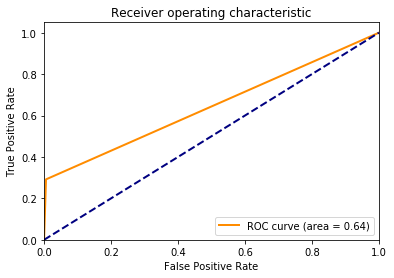

In [8]:
plot_ROC_curve(y_pred_all, y_test_all)

In [38]:
y_pred_all = []
y_test_all = []
print('On noisy dataset:')
_, dataset_noisy_test = prepare_dataset(dataset_noisy)
with torch.no_grad():
    mean_acc = 0
    mean_jacc = 0
    for X, y in dataset_noisy_test:
        model.init_hidden()
        y_pred = F.softmax(model(X)[1], dim=1).data
        y_pred = y_pred[:, 1] > y_pred[:, 0]
        mean_acc += (y_pred.numpy() == y.numpy()).mean()
        tmp = (y_pred.numpy() | y.numpy()).sum()
        mean_jacc += 1 if tmp == 0 else (y_pred.numpy() & y.numpy()).sum() / tmp
        y_pred_all.append(y_pred.numpy())
        y_test_all.append(y.numpy())
    mean_acc /= len(dataset_test)
    mean_jacc /= len(dataset_test)
    print(f'Mean test accuracy: {mean_acc:.6f}')
    print(f'Mean test Jaccard similarity: {mean_jacc:.6f}')
y_pred_all = np.array(y_pred_all).flatten()
y_test_all = np.array(y_test_all).flatten()

On noisy dataset:
Mean test accuracy: 0.970481
Mean test Jaccard similarity: 0.659327


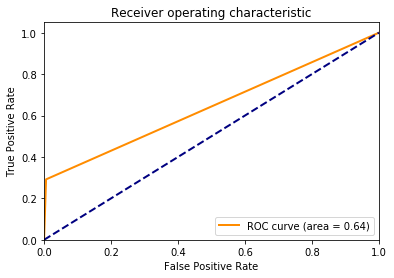

In [39]:
plot_ROC_curve(y_pred_all, y_test_all)

In [43]:
predictor = RnnPredictor(model)

In [40]:
def plot_sample(sname):
    
    plt.subplot(211)
    X = dataset[dataset.SNAME == sname].iloc[:, :-2].values
    y = dataset[dataset.SNAME == sname].iloc[:, -2].values
    y_pred = predictor.predict_proba(X).numpy()[:, 1]
    xs = np.arange(len(y))
    plt.title('Without noise')
    plt.plot(xs, y, c='r')
    plt.plot(xs, y_pred, c='b')
    
    plt.subplot(212)
    X = dataset_noisy[dataset_noisy.SNAME == sname].iloc[:, :-2].values
    y = dataset_noisy[dataset_noisy.SNAME == sname].iloc[:, -2].values
    y_pred_noise = predictor.predict_proba(X).numpy()[:, 1]
    xs = np.arange(len(y))
    plt.title('With noise')
    plt.plot(xs, y, c='r')
    plt.plot(xs, y_pred_noise, c='b')
    
    # print(y_pred - y_pred_noise)
    
    plt.show()

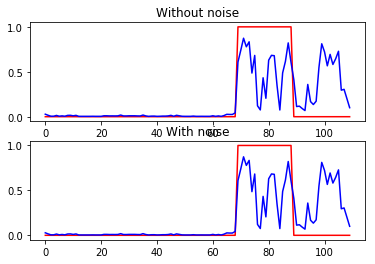

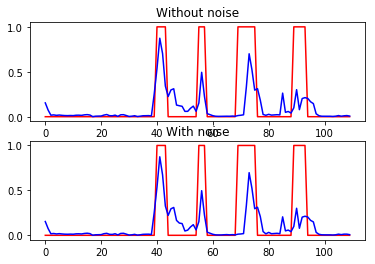

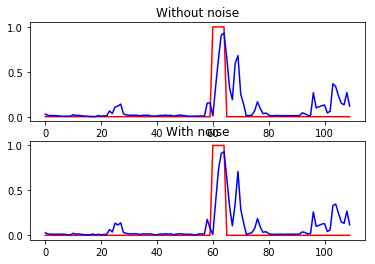

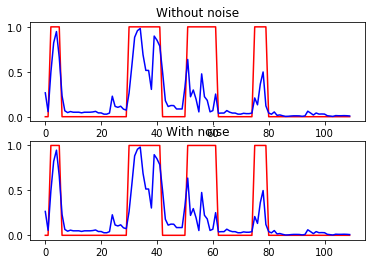

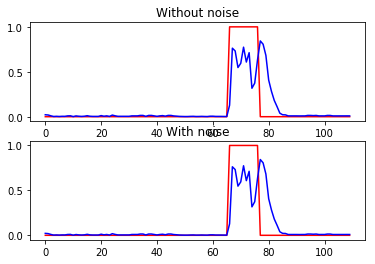

In [41]:
plot_sample('S0510')
plot_sample('S0549')
plot_sample('S2378')
plot_sample('S1263')
plot_sample(np.random.choice(dataset.SNAME))

In [42]:
!export PYTHONPATH='/home/eshcherbin/deploy/laughter/'; python laughter_prediction/process_audio.py --wav_path vocalizationcorpus/data/S0510.wav
!export PYTHONPATH='/home/eshcherbin/deploy/laughter/'; python laughter_prediction/process_audio.py --wav_path vocalizationcorpus/data/S0549.wav
!export PYTHONPATH='/home/eshcherbin/deploy/laughter/'; python laughter_prediction/process_audio.py --wav_path vocalizationcorpus/data/S2378.wav
!export PYTHONPATH='/home/eshcherbin/deploy/laughter/'; python laughter_prediction/process_audio.py --wav_path vocalizationcorpus/data/S1263.wav

laughter_prediction/process_audio.py:84: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  pred_classes = predictor.predict(feature_df.as_matrix())
Target intervals
[(6.9, 7.5), (8.0, 8.200000000000001), (8.6, 8.8), (9.8, 10.5)]
laughter_prediction/process_audio.py:84: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  pred_classes = predictor.predict(feature_df.as_matrix())
Target intervals
[(4.0, 4.2)]
laughter_prediction/process_audio.py:84: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  pred_classes = predictor.predict(feature_df.as_matrix())
Target intervals
[(6.2, 6.5)]
laughter_prediction/process_audio.py:84: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  pred_classes = predictor.predict(feature_df.as_matrix())
Target intervals
[(0.30000000000000004, 0.5), (3.1, 3.7), (3.9000000000000004, 4.10000000000000